# Radial Tree

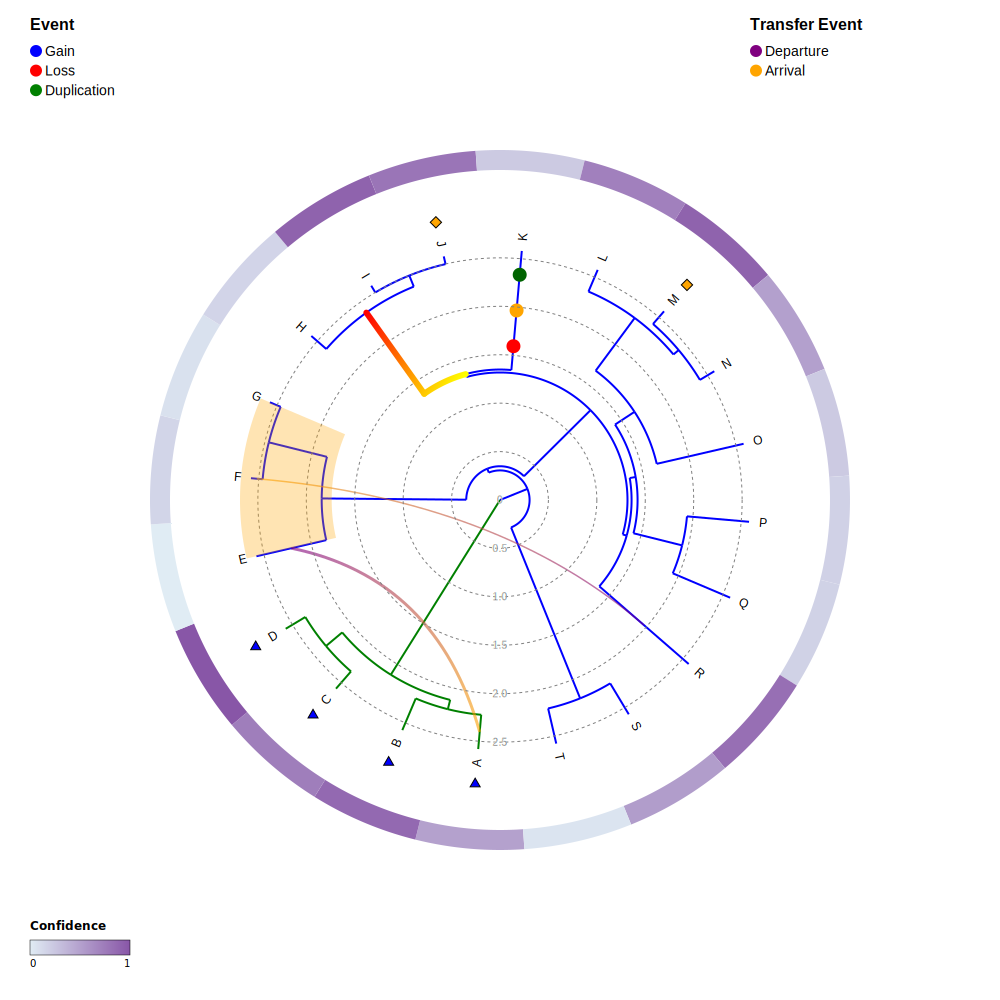

In [1]:
import phylustrator as ph
import ete3
import random

with open("../examples/data/basic/tree.nwk") as f:
    t = ete3.Tree(f.readline())
    
my_style = ph.TreeStyle(
    radius=250,
    degrees=360,
    leaf_r=0,               # Changed leaf_size -> leaf_r
    node_r=0,               # Changed node_size -> node_r
    branch_stroke_width=2,  # Changed branch_size -> branch_stroke_width
    branch_color="black",
    font_size=12,
    font_family="Arial",
    rotation=95,
)

r = ph.RadialTreeDrawer(t, style=my_style)

# 1. Custom Branch Colors
target = t.get_common_ancestor("A", "D") 
node_colors = {n: "blue" for n in t.traverse()}
for n in target.traverse():
    node_colors[n] = "green"

r.draw(branch2color=node_colors)
r.add_leaf_names()

# Adding shapes
r.add_leaf_shapes(
    leaves=["A", "B", "C", "D"],
    shape="triangle",
    fill="blue",
    r=5,                   # size=10 -> r=5 (radius)
    stroke="black",
    stroke_width=1,
    offset=35, 
)

r.add_leaf_shapes(
    leaves=["J", "M"],
    shape="square",
    fill="orange",
    r=4,                   # size=8 -> r=4 (radius)
    stroke="black",
    stroke_width=1,
    offset=35,
    rotation=45,
)

events = [
    {"branch": "K", "where": 0.2, "shape": "circle", "fill": "red", "r": 7},       # size=14 -> r=7
    {"branch": "K", "where": 0.5, "shape": "circle", "fill": "orange","r": 7},    # size=14 -> r=7
    {"branch": "K", "where": 0.8, "shape": "circle", "fill": "darkgreen", "r": 7}, # size=14 -> r=7
]
r.add_branch_shapes(events)

heatmap_vals = {leaf.name: random.uniform(0, 1) for leaf in t.get_leaves()}

r.add_heatmap(             # add_ring_heatmap -> add_heatmap
    heatmap_vals,
    width=20,
    offset=80,             # padding -> offset
    low_color="#e0ecf4",
    high_color="#8856a7"
)

transfer_data = [
    {"from": "E", "to": "A", "freq": 1.0},
    {"from": "R", "to": "F", "freq": 0.5},
]

r.plot_transfers(
    transfer_data,
    curve_type="C",       
    stroke_width=3,
    opacity=0.6,
    gradient_colors=("purple", "orange"),
    arc_intensity=80 
)

r.add_time_axis(
    ticks=[0, 0.5, 1.0, 1.5, 2.0, 2.5], 
    label="",
    stroke="gray",
    stroke_dasharray="3,3",
)

target_clade = t.get_common_ancestor("E", "G")
r.highlight_clade(target_clade, color="orange", opacity=0.3)

# Testing newly implemented parity functions
target_node = t.get_common_ancestor("H", "J")
r.highlight_branch(target_node, color="red", stroke_width=4)
r.gradient_branch(target_node, colors=("yellow", "red"), stroke_width=6)
r.add_node_names(color="blue", padding=20)

# To explain categorical traits
r.add_categorical_legend({"Gain": "blue", "Loss": "red", "Duplication":"green"}, title="Event")

# To explain your transfers
r.add_transfer_legend(colors=("purple", "orange"), x=250)

# To explain your heatmap
r.add_color_bar("#e0ecf4", "#8856a7", vmin=0, vmax=1, title="Confidence")

r.d


In [2]:
r.save_svg("../examples/figures/radial_tree.svg")
r.save_png("../examples/figures/radial_tree.png", scale=3.0)